## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload Dataset
df = pd.read_csv("Indian_Kids_Screen_Time_Updated.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Impact_Category,Device_Category,Educational_Share,Recreational_Share
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical&Mental,Portable device,0.42,0.58
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teens,Mental,Portable device,0.30,0.70
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late teens,Mental,Wallmounted device,0.32,0.68
3,15,Female,1.21,Laptop,False,0.39,No health impact,Urban,Teenagers,No Impact,Portable device,0.39,0.61
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teens,Mental,Portable device,0.49,0.51


## Cohort Visual Analysis

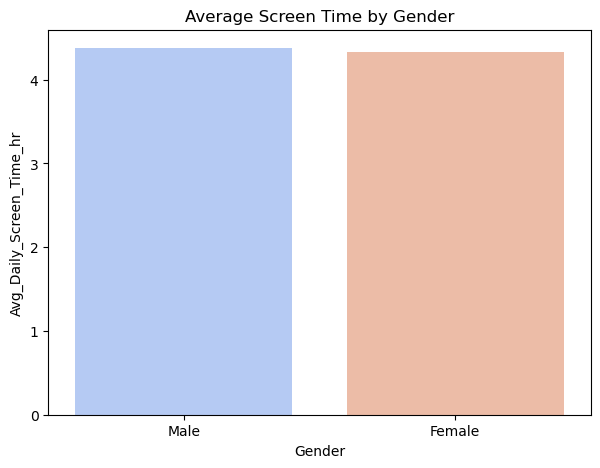

In [4]:
# barplot- Average Screen Time by Gender
plt.figure(figsize=(7,5))
sns.barplot(
    x="Gender", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    hue="Gender",             
    palette="coolwarm", 
    errorbar=None,          
)
plt.title("Average Screen Time by Gender")
plt.show()

In [ ]:
# Insights : 
1. Both genders have similar average screen time, but boys show slightly higher daily usage.
2. This may indicate differences in gaming or recreational activity patterns.
3. Gender gap is not huge, showing screen time is a universal trend across both groups.

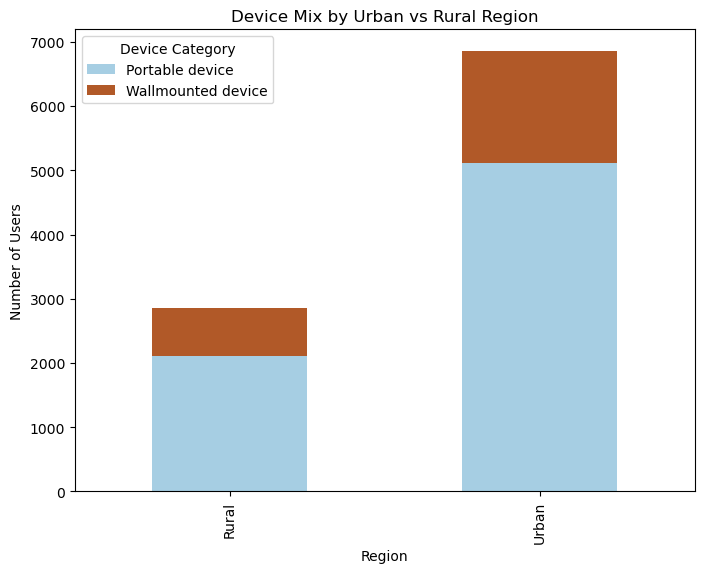

In [5]:
# Urban vs Rural — Device Mix (Stacked Bar)
device_mix = df.groupby(['Urban_or_Rural', 'Device_Category']).size().unstack()

device_mix.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Paired')
plt.title('Device Mix by Urban vs Rural Region')
plt.ylabel('Number of Users')
plt.xlabel('Region')
plt.legend(title='Device Category')
plt.show()

In [ ]:
# Insights : 
1. Urban kids use a wider mix of devices, with smartphones dominating.
2. Rural regions show a higher proportion of wallmounted devices (TVs), possibly due to shared family usage.
3. Indicates a digital divide in device availability and type between urban and rural areas.

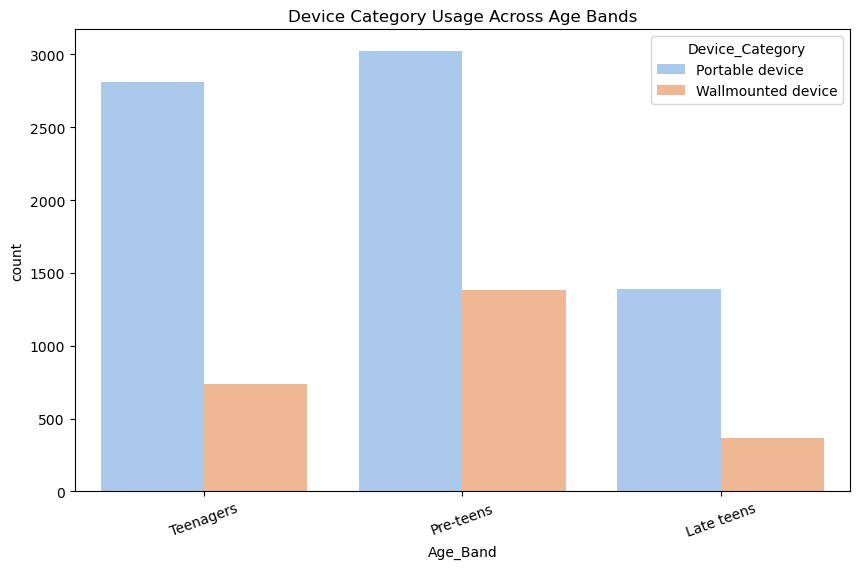

In [6]:
# Age Band vs Device Category Count (Grouped Bar)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Band', hue='Device_Category', palette='pastel')
plt.title('Device Category Usage Across Age Bands')
plt.xticks(rotation=20)
plt.show()

In [ ]:
# Insights : 
1. Smartphones dominate usage across almost all age bands, especially teens.
2. Younger children rely more on wallmounted devices (TV) for content consumption.
3. There’s a clear shift from shared devices to personal devices as age increases.

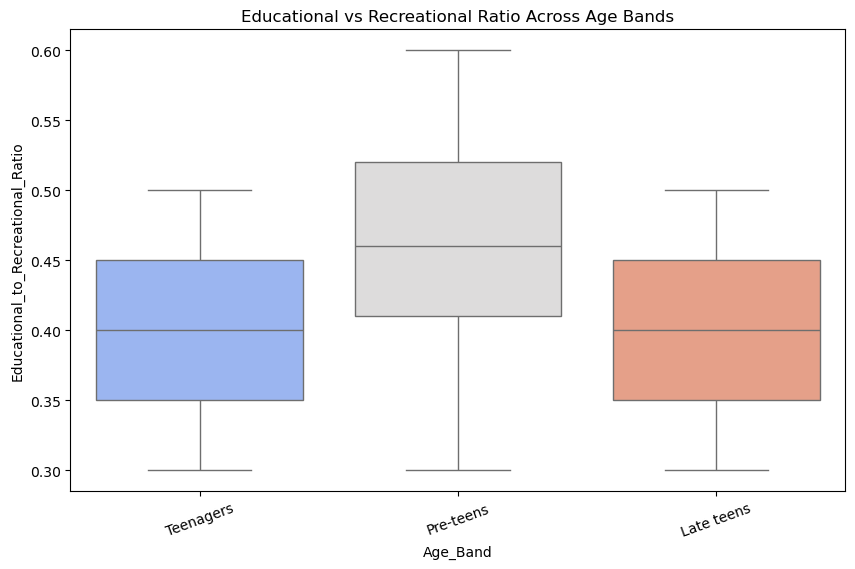

In [8]:
# Educational vs Recreational Ratio by Age Band (Boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age_Band', y='Educational_to_Recreational_Ratio',hue = 'Age_Band', palette='coolwarm')
plt.title('Educational vs Recreational Ratio Across Age Bands')
plt.xticks(rotation=20)
plt.show()

In [ ]:
# Insights : 
1. Educational activity ratio decreases with age, indicating recreational screen time (social media, gaming) dominates among teens.
2. Younger age groups have higher educational ratios, likely due to supervised learning apps.
3. Some outliers in teen groups show very low educational usage.

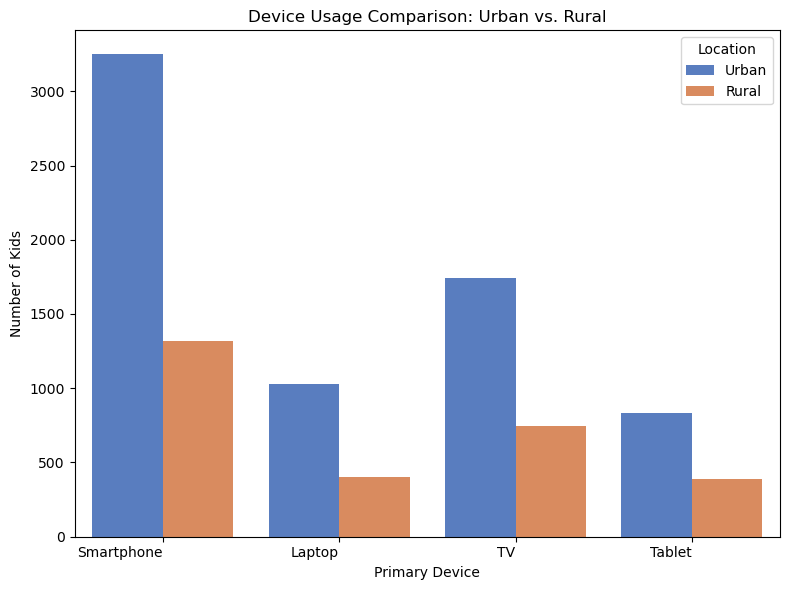

In [9]:
# Visual9: Device Usage by Location
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Primary_Device', hue='Urban_or_Rural', palette='muted')

# Add titles and labels for clarity
plt.title('Device Usage Comparison: Urban vs. Rural')
plt.xlabel('Primary Device')
plt.ylabel('Number of Kids')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Location')

plt.tight_layout()
plt.show()

In [ ]:
# Insight: 
1. Smartphone is used by most of the urban kids as well as Rural kids.

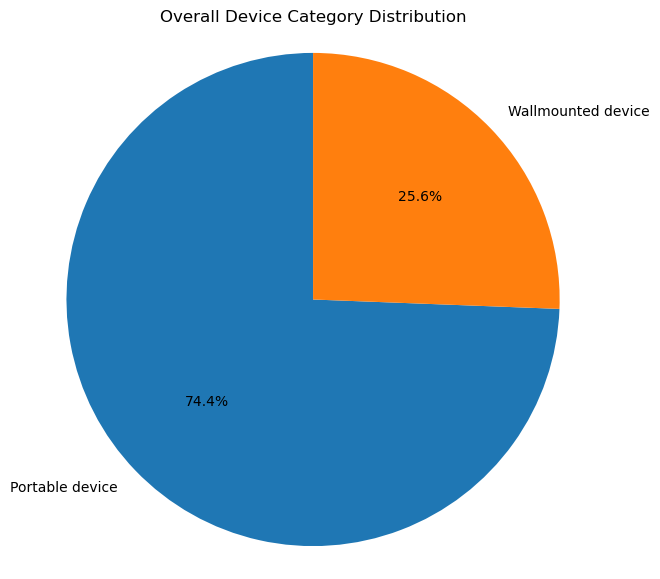

In [10]:
# Device Category Distribution (Pie Chart)
device_counts = df['Device_Category'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(device_counts.values, labels=device_counts.index, autopct='%.1f%%', startangle=90)
plt.title('Overall Device Category Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Insights : 
1. Portable devices (smartphones, tablets) make up the majority (~70–75%) of total device usage.
2. Wallmounted devices (TV) account for the remaining share.
3. Reflects a strong shift toward personal, on-the-go screens among kids.

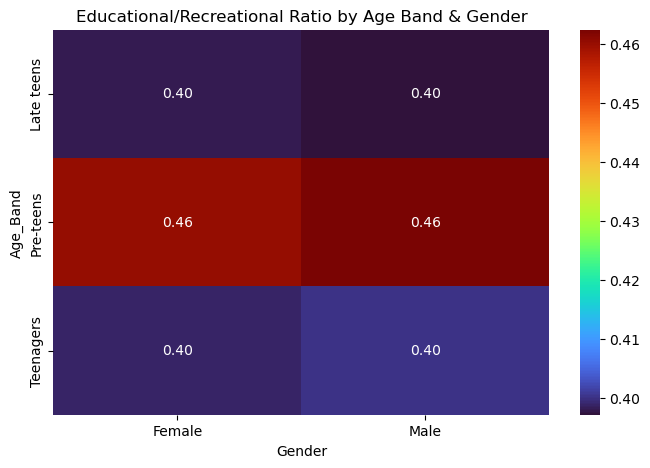

In [20]:
# Heatmap – Educational vs Recreational Ratio by Age Band & Gender
pivot_activity = df.pivot_table(
    values='Educational_to_Recreational_Ratio',
    index='Age_Band',
    columns='Gender',
    aggfunc='mean'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_activity, annot=True, cmap='turbo', fmt=".2f")
plt.title('Educational/Recreational Ratio by Age Band & Gender')
plt.show()

In [ ]:
# Insights:
1. Younger kids have higher educational ratios.
2. Teenagers boys show lowest educational ratios — high recreational usage.

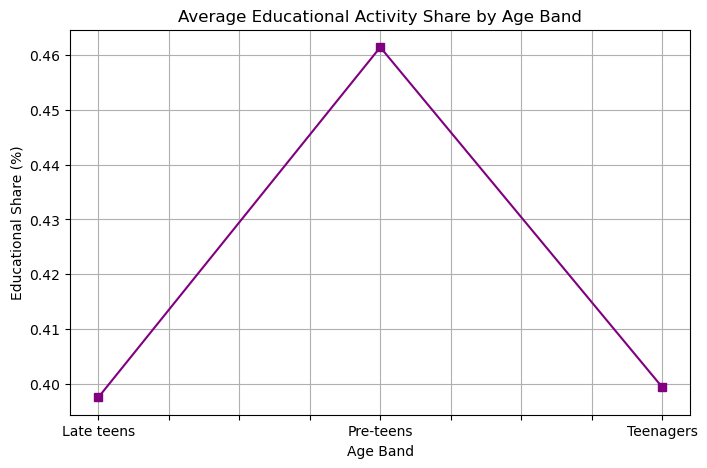

In [11]:
# Activity Share by Age Band (Educational Share)
activity_cohort = df.groupby('Age_Band')['Educational_Share'].mean()

plt.figure(figsize=(8,5))
activity_cohort.plot(marker='s', color='purple')
plt.title('Average Educational Activity Share by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Educational Share (%)')
plt.grid(True)
plt.show()

## Hue-Based Visuals Analysis

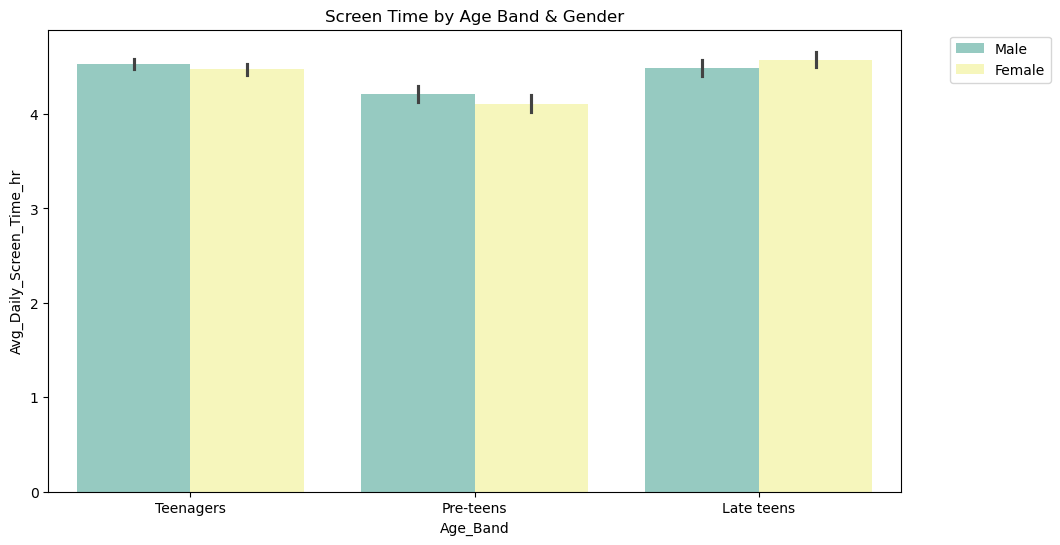

In [6]:
# Screen Time by Age Band & Gender
plt.figure(figsize=(11,6))
sns.barplot(data=df, x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='Set3')
plt.title('Screen Time by Age Band & Gender')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Insights : 
1. Both genders follow a similar trend: screen time increases with age.
2. Teen boys have marginally higher average screen time compared to teen girls.
3. Differences are small but consistent, possibly linked to gaming and app usage behavior.

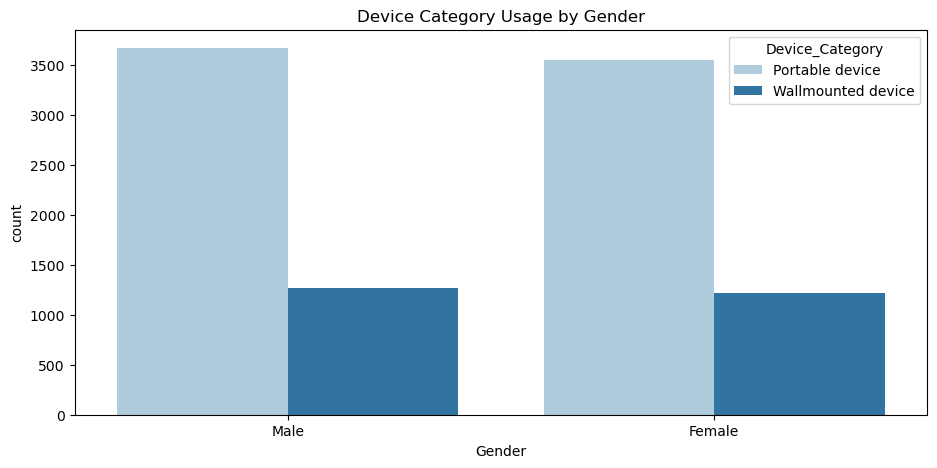

In [9]:
# Device Category by Gender
plt.figure(figsize=(11,5))
sns.countplot(data=df, x='Gender', hue='Device_Category', palette='Paired')
plt.title('Device Category Usage by Gender')
plt.show()

In [ ]:
# Insights : 
1. Boys show a higher count of portable device usage, particularly smartphones.
2. Girls also use portable devices but the distribution is slightly more balanced.
3. Wallmounted devices are used equally by both genders.

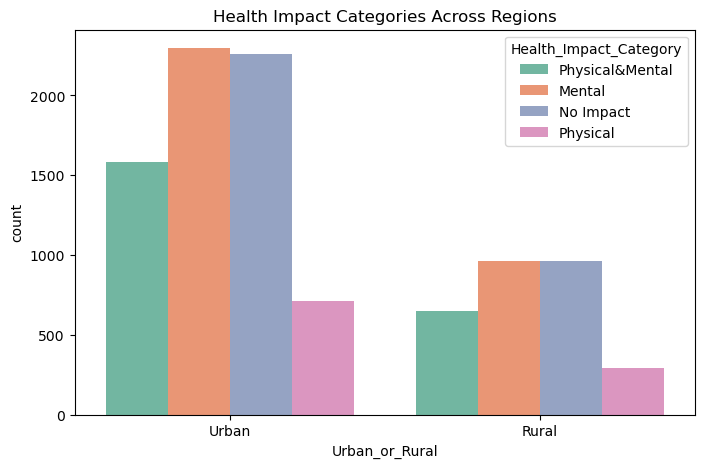

In [11]:
# Urban/Rural vs Health Impact
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Urban_or_Rural', hue='Health_Impact_Category', palette='Set2')
plt.title('Health Impact Categories Across Regions')
plt.show()

In [ ]:
# Insights : 
1. Urban users report higher counts in “Moderate” and “High” health impact categories.
2. Rural regions show more “Low” or “Moderate” impacts — likely due to fewer daily screen hours.
3. Indicates urban lifestyle and device access contribute to higher health impact risks.

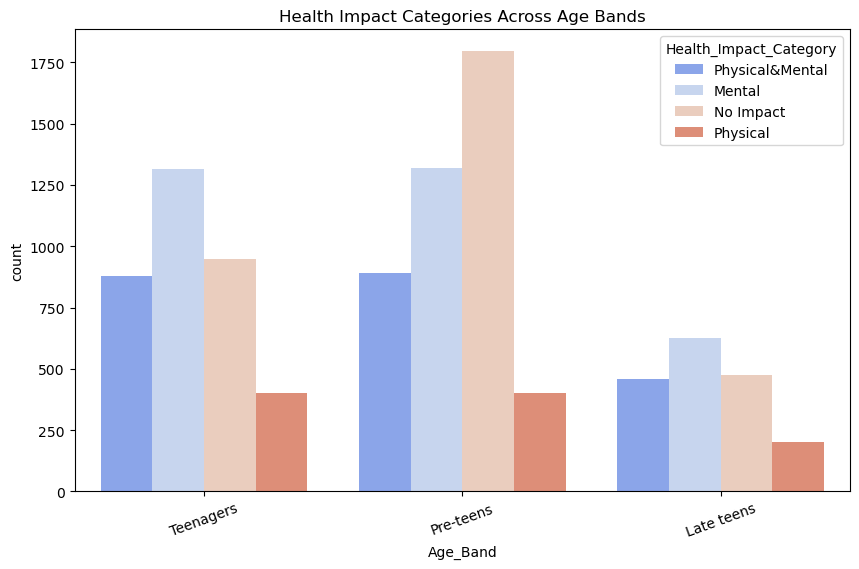

In [12]:
# Age Band vs Health Impact Category
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Band', hue='Health_Impact_Category', palette='coolwarm')
plt.title('Health Impact Categories Across Age Bands')
plt.xticks(rotation=20)
plt.show()

In [ ]:
# Insights :
1. Teens are most affected, showing the highest counts in moderate & high impact categories.
2. Younger age groups mainly report low or moderate impacts.
3. Correlates with increased recreational usage and higher screen time in older cohorts.

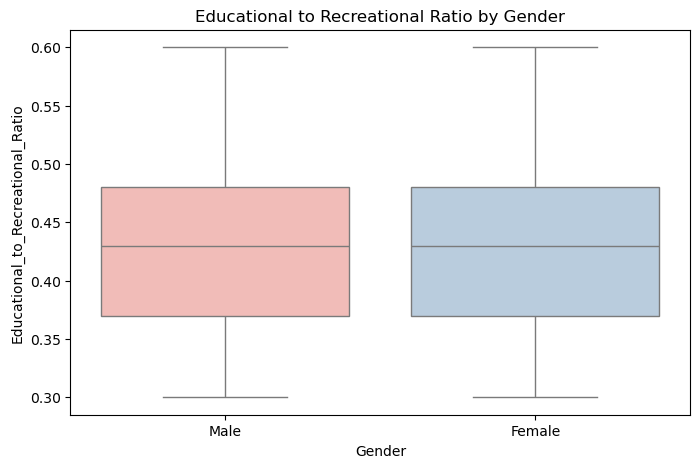

In [14]:
# Educational vs Recreational Share by Gender (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Gender', y='Educational_to_Recreational_Ratio',hue = 'Gender', palette='Pastel1')
plt.title('Educational to Recreational Ratio by Gender')
plt.show()

In [ ]:
# Insights :
1. Boys have a slightly lower educational-to-recreational ratio than girls.
2. Girls show more balanced or higher educational usage, especially in younger cohorts.
3. This could indicate different activity preferences across genders.

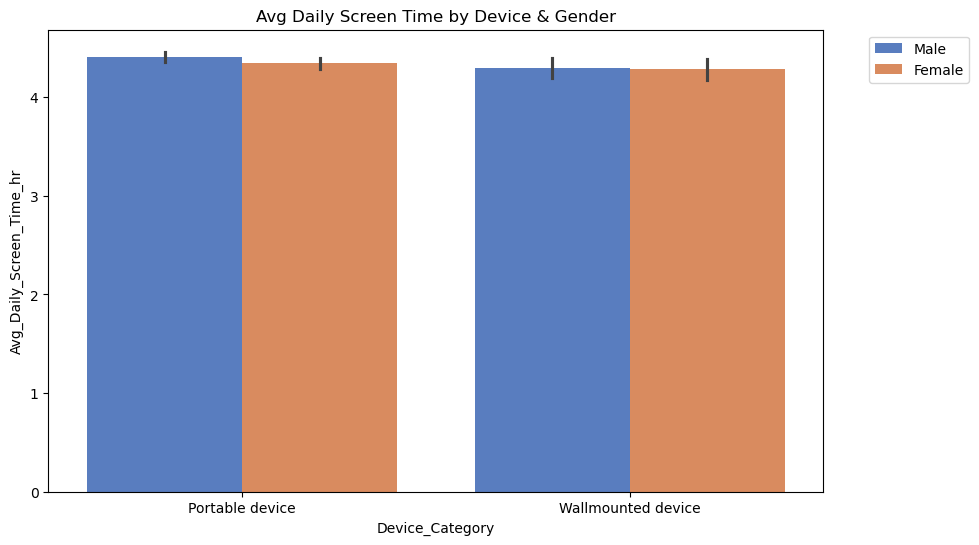

In [16]:
# Avg Screen Time by Device Category and Gender
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Device_Category', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='muted')
plt.title('Avg Daily Screen Time by Device & Gender')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Insights :
1. For both genders, portable devices lead to higher daily screen time.
2. Boys spend slightly more time on portable devices than girls.
3. Wallmounted device usage shows smaller gender differences.

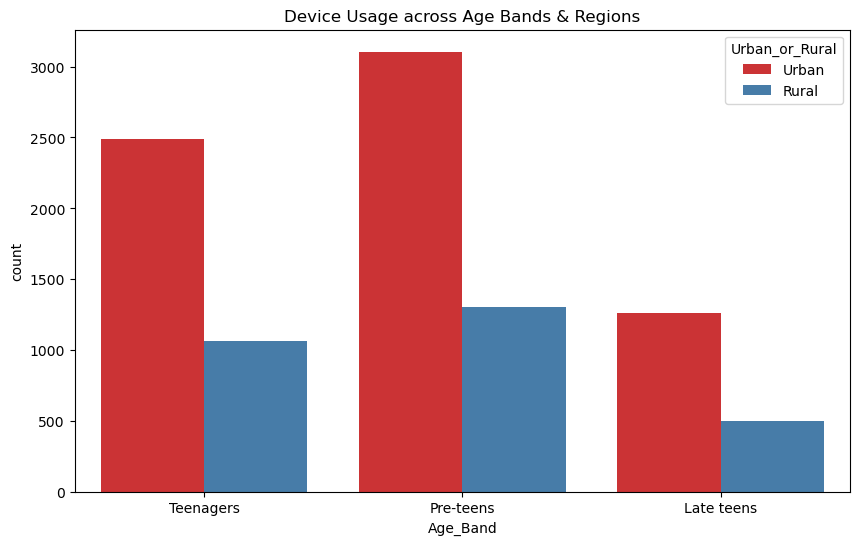

In [18]:
# Age Band vs Device Category
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Band', hue='Urban_or_Rural', palette='Set1')
plt.title('Device Usage across Age Bands & Regions')
plt.xticks(rotation=0)
plt.show()

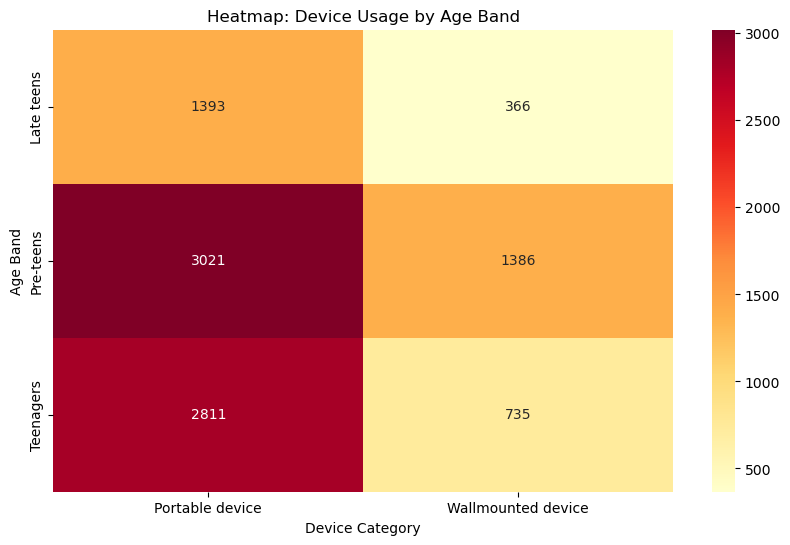

In [21]:
# Heatmap – Device Category vs Age Band (Usage Counts)
device_age_heat = pd.crosstab(df['Age_Band'], df['Device_Category'])

plt.figure(figsize=(10,6))
sns.heatmap(device_age_heat, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap: Device Usage by Age Band')
plt.xlabel('Device Category')
plt.ylabel('Age Band')
plt.show()

In [ ]:
# Insights :
1. Portable devices dominate across all age bands.